#question 1

##Subpart a:Dimension reduction and visualization

In [11]:
import csv
import math
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
data= open('/content/drive/MyDrive/Colab Notebooks/data_sets/wine.data')
columns=["Class","Alcohol","Malic acid"	,"Ash","Alcalinity of ash","Magnesium","Total phenols",	"Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
data=pd.read_csv( data, sep=",",names=columns)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [21]:
'''no missing values and data type is compatible too'''

scaler = StandardScaler()
X= data.iloc[:, 1:]
y= data.iloc[:, 0]

scaler.fit(X )
X  = scaler.transform(X )
X  = pd.DataFrame(X ,columns = columns[1:])

In [22]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(data)
# Create a PCA instance: pca
pca = PCA(n_components=14 )
principalComponents = pca.fit_transform(X_std)

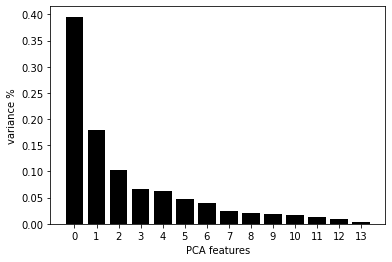

In [23]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

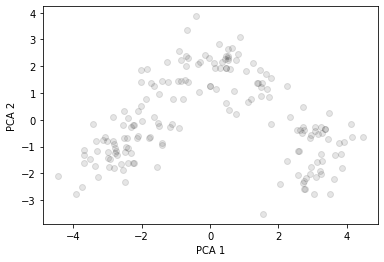

In [24]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

##Subpart b: Implementing kmeans

In [25]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X )
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, y], axis = 1)


In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(principalComponents)


In [27]:
print("True Class Labels :- ")
print(list(y))

print("Predicted Class labels :- ")
print(kmeans.labels_)


True Class Labels :- 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Predicted Class labels :- 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


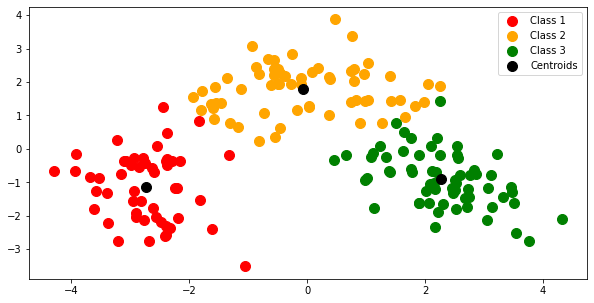

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(principalComponents[y_kmeans == 0, 0], principalComponents[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Class 1')
plt.scatter(principalComponents[y_kmeans == 1, 0], principalComponents[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Class 2')
plt.scatter(principalComponents[y_kmeans == 2, 0], principalComponents[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Class 3')

#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

##Subpart c: the Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.3893881308900331
For n_clusters = 3 The average silhouette_score is : 0.45323512156839507
For n_clusters = 4 The average silhouette_score is : 0.4118123531024416
For n_clusters = 5 The average silhouette_score is : 0.38893303561611653
For n_clusters = 6 The average silhouette_score is : 0.30887461426419016


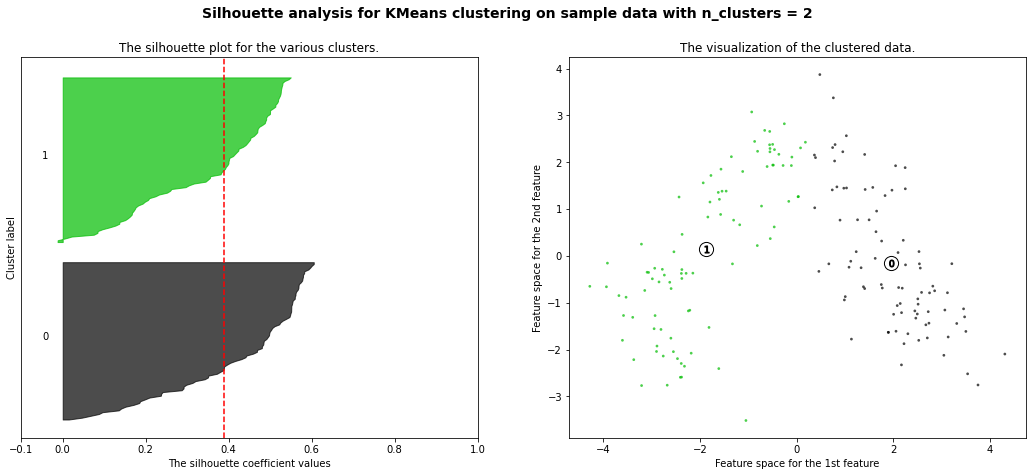

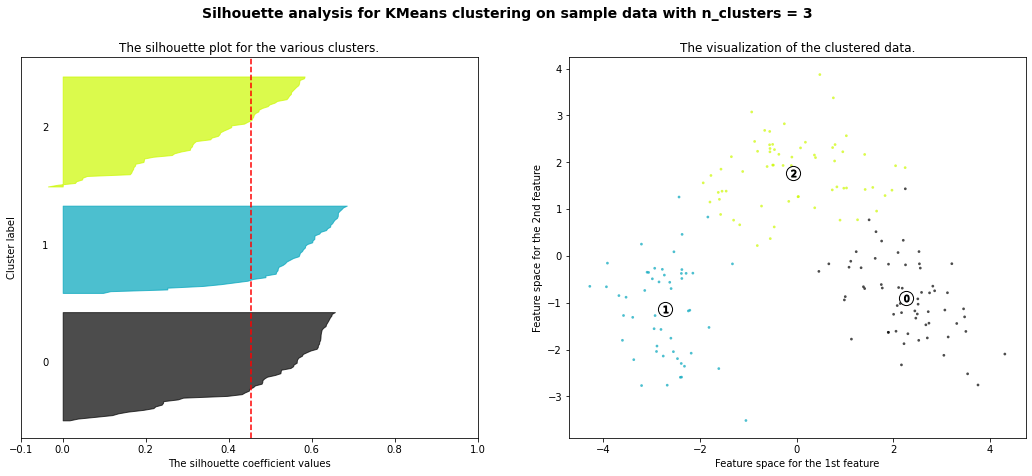

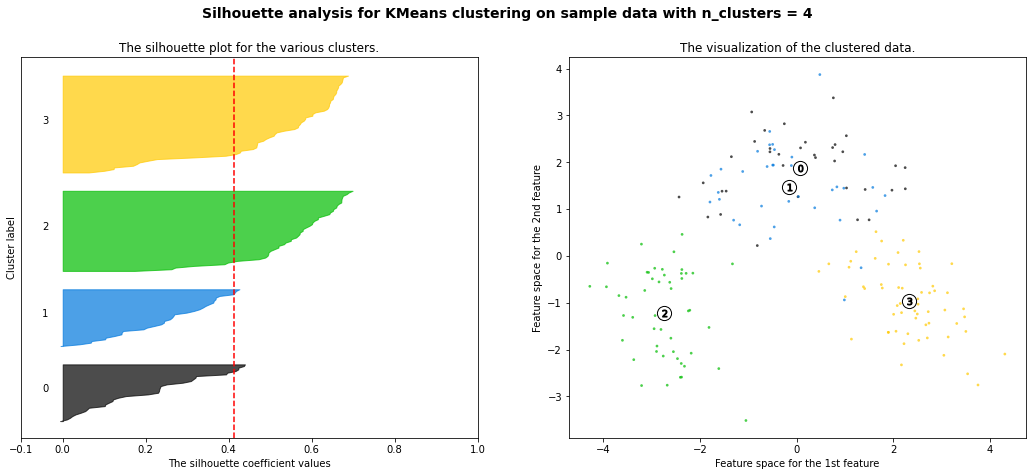

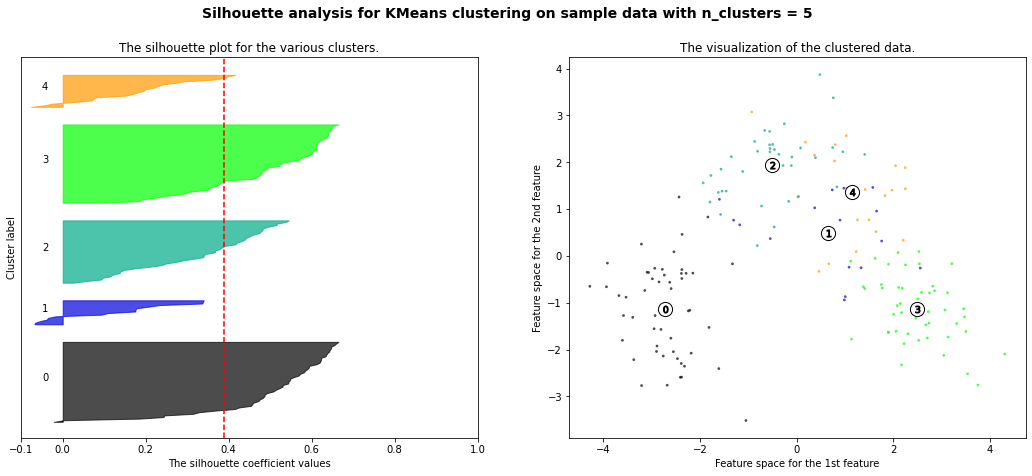

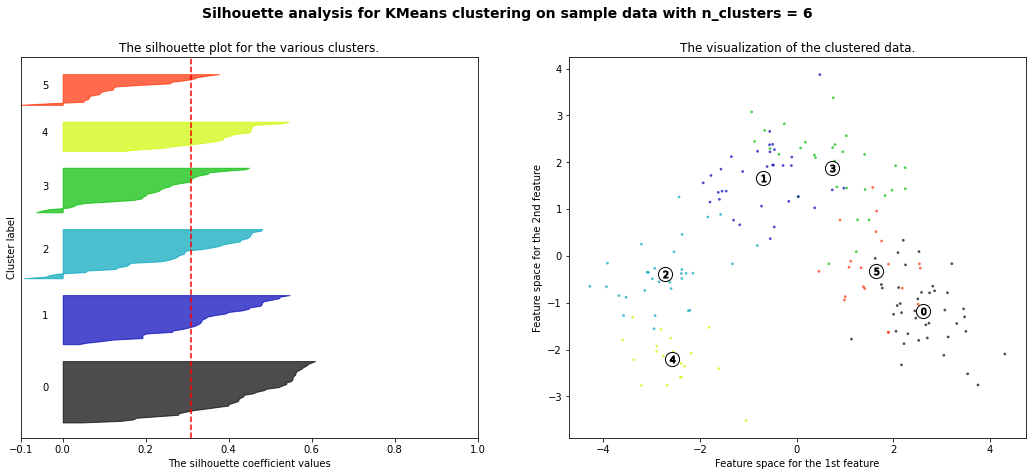

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(principalComponents) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(principalComponents)
    silhouette_avg = silhouette_score(principalComponents, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(principalComponents, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        principalComponents[:, 0], principalComponents[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


##Subpart d: elbow method to find k

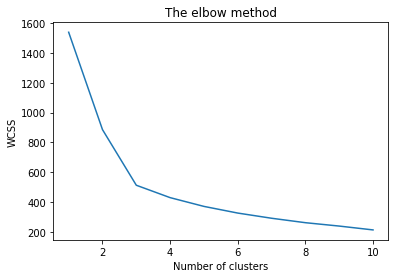

'https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/'

In [30]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()



#Question 2

##Subpart a and b: k-means from scratch

In [77]:

import numpy as np
from random import randint
import matplotlib.pyplot as plt
from matplotlib import style


In [78]:
train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/fashion/fashion-mnist_train.csv')
test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/fashion/fashion-mnist_test.csv')

print(train.info())
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
(60000, 785)


In [115]:
train= train.drop(['label'], axis=1)

In [127]:
from numpy.linalg import norm

class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=42, c_provided=False , user_centroids=None, ):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids= user_centroids
        self.centroids_provided= c_provided

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        if self.centroids_provided==False:
          self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

##Subpart c: Train k-means with k=10

In [116]:
model= Kmeans( n_clusters= 10)
model.fit( np.array(train))

In [141]:
print('random initialization sse :',model.error)

random initialization sse : 126906769457.6094


In [117]:
centroids = model.centroids
print(centroids)

[[0.00000000e+00 1.02774923e-02 1.02774923e-02 ... 5.80524152e+00
  2.82237067e+00 2.00753683e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.90985485e-04 0.00000000e+00 ... 1.81436211e-02
  2.86478228e-03 2.67379679e-03]
 ...
 [0.00000000e+00 1.70575693e-03 2.43070362e-02 ... 5.93176972e-01
  4.27292111e-01 9.16844350e-02]
 [1.77597361e-03 4.05936826e-03 2.08042623e-02 ... 2.98439680e+00
  1.36534314e+00 8.82912597e-02]
 [8.32206387e-04 4.99323832e-03 3.27681265e-02 ... 6.48746489e+00
  8.96702382e-01 5.34692604e-02]]


In [118]:
labels= np.unique(model.labels)
pred= list(model.labels)
for l in labels:
  print(f'occurence of class {l} label is {pred.count(l)}')

occurence of class 0 label is 5838
occurence of class 1 label is 7576
occurence of class 2 label is 5236
occurence of class 3 label is 7405
occurence of class 4 label is 2562
occurence of class 5 label is 6334
occurence of class 6 label is 5208
occurence of class 7 label is 2345
occurence of class 8 label is 7883
occurence of class 9 label is 9613


##Subpart d: Visualization

In [103]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
train_reduced= pca.fit_transform( train)
centres= pca.transform( centroids)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


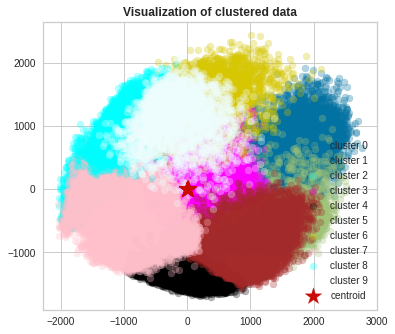

In [107]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
color= ['b', 'g', 'cyan', 'magenta', 'black', 'brown', 'y', 'pink', 'aqua', 'azure']

for i in range(10):
  plt.scatter(train_reduced[model.labels == i, 0], train_reduced[model.labels == i, 1],
            c=color[i], label='cluster '+str(i), alpha=0.3 )

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid', )
plt.legend()
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
# plt.xlabel('Eruption time in mins')
# plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');


##Subpart e: visualization of 10 images from each cluster

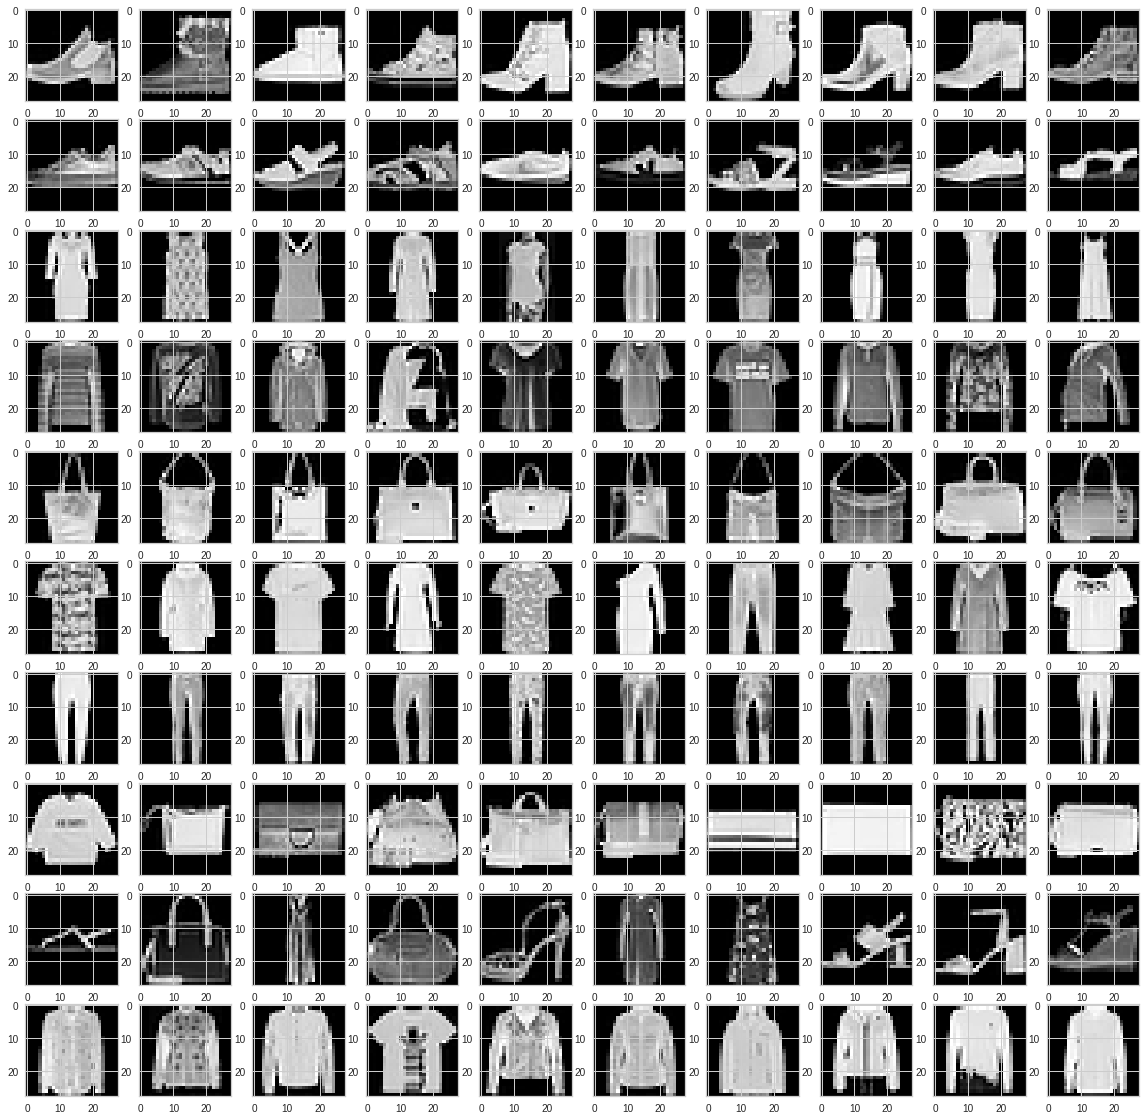

In [125]:
# plt.figure(figsize=(20,20))
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

counter_=0
for l in range(10):
  req_img= train[model.labels==l][:10]
  req_img_arr= np.array(req_img)

  for i,img in enumerate(req_img_arr):
    img_pl= img.reshape((28, 28))
    ax=plt.subplot(10,10,counter_+1)
    counter_+=1
    plt.imshow(img_pl , cmap='gray', vmin=0, vmax=255)


    

##Subpart f: class_init k-means

In [138]:
custom_centroids=[]
train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/fashion/fashion-mnist_train.csv')

for i in range(10):
  index=list(train['label']).index(i)
  custom_centroids.append( np.array([train.drop(['label'], axis=1).iloc[index, :]]))

train=train.drop(['label'], axis=1)

In [139]:
custom_centroids=np.array( custom_centroids)

model2= Kmeans( n_clusters= 10, c_provided=True, user_centroids= custom_centroids)
model2.fit( np.array(train))

In [144]:
print('custom initialization sse :',model2.error)

custom initialization sse : 124543866224.80537


In [142]:
labels= np.unique(model2.labels)
pred= list(model2.labels)
for l in labels:
  print(f'occurence of class {l} label is {pred.count(l)}')

occurence of class 0 label is 3795
occurence of class 1 label is 7787
occurence of class 2 label is 2351
occurence of class 3 label is 5174
occurence of class 4 label is 7596
occurence of class 5 label is 7650
occurence of class 6 label is 9710
occurence of class 7 label is 7534
occurence of class 8 label is 2571
occurence of class 9 label is 5832


##Subpart g: 10 images corresponding to each cluster

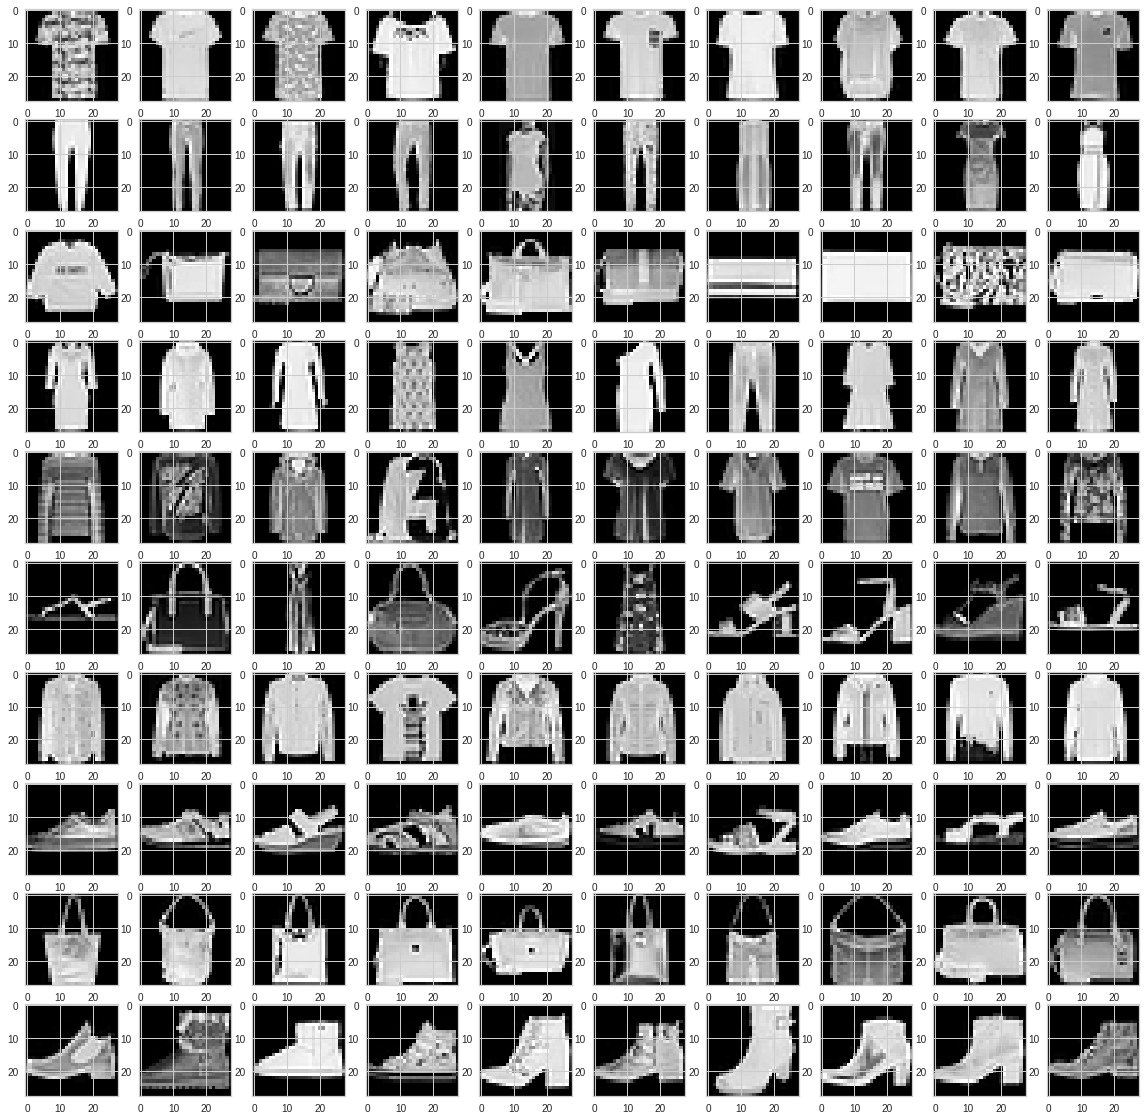

In [143]:
# plt.figure(figsize=(20,20))
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

counter_=0
for l in range(10):
  req_img= train[model2.labels==l][:10]
  req_img_arr= np.array(req_img)

  for i,img in enumerate(req_img_arr):
    img_pl= img.reshape((28, 28))
    ax=plt.subplot(10,10,counter_+1)
    counter_+=1
    plt.imshow(img_pl , cmap='gray', vmin=0, vmax=255)


    

##Subpart h: error of both procedures

In [145]:
print('random initialization sse :',model.error)
print('custom initialization sse :',model2.error)

random initialization sse : 126906769457.6094
custom initialization sse : 124543866224.80537


#Question 3

##Subpart a and b: Normalize dataset and (visualization)

In [31]:
import pandas as pd
import numpy as np
import random
import os
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

  

'https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6'

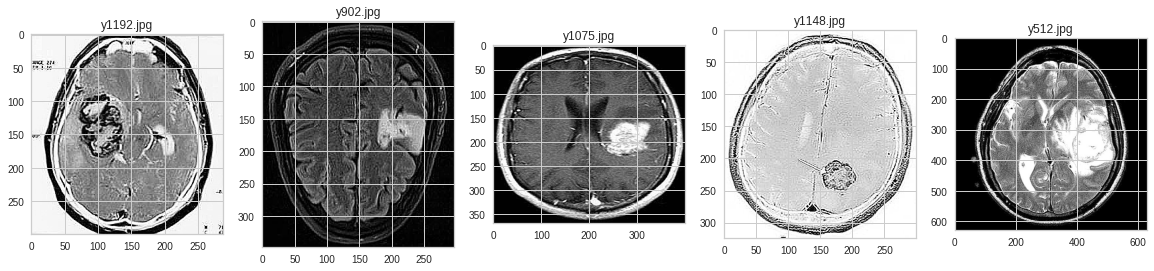

In [32]:
plt.figure(figsize=(20,20))
yes_folder=r'/content/drive/MyDrive/Colab Notebooks/data_sets/archive (1)/yes'
for i in range(5):
    file = random.choice(os.listdir(yes_folder))
    image_path= os.path.join(yes_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

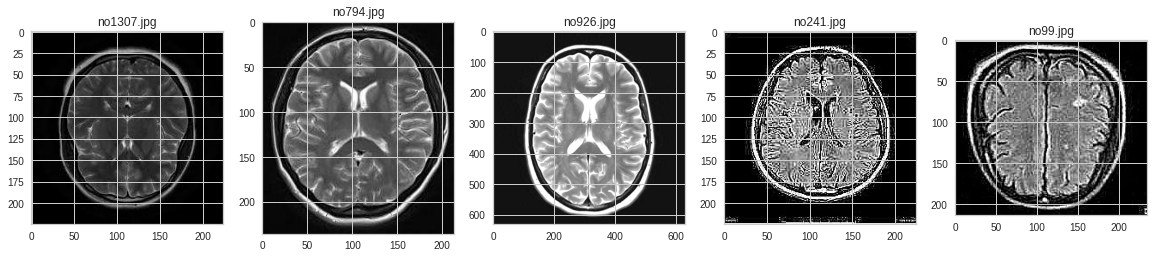

In [33]:
plt.figure(figsize=(20,20))
no_folder=r'/content/drive/MyDrive/Colab Notebooks/data_sets/archive (1)/no'
for i in range(5):
    file = random.choice(os.listdir(no_folder))
    image_path= os.path.join(no_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [34]:
IMG_WIDTH=400
IMG_HEIGHT=400

def create_dataset(img_folder, class_=0):
   
    img_data_array=[]
    class_name=[]
   
    for file in os.listdir(img_folder):
       
            image_path= os.path.join(img_folder,  file)
            image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            
            image=np.array(image)
            image=np.ravel(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(class_)
    return img_data_array, class_name

yes_data, yes_class_name= create_dataset( yes_folder, 1)
no_data, no_class_name= create_dataset( no_folder )

In [35]:
img_data= yes_data+ no_data
class_data= yes_class_name +no_class_name

img_data= np.array( img_data)

##Subpart b and d: dimension reduction and visualization and Agglomerative hierarchical clustering

In [ ]:

# Create a PCA instance: pca
pca = PCA(n_components=0.95 )
reduced= pca.fit(img_data)
plt.plot( pca.explained_variance_ratio_)
# principalComponents = pca.fit_transform(img_data)

# Plot the explained variances
# plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
# plt.xticks(features)
# # Save components to a DataFrame
# PCA_components = pd.DataFrame(principalComponents)

In [9]:
print(pca.n_components_)

537


In [36]:
pca_= PCA(n_components= 537)
img_data_reduced= pca_.fit_transform(img_data)

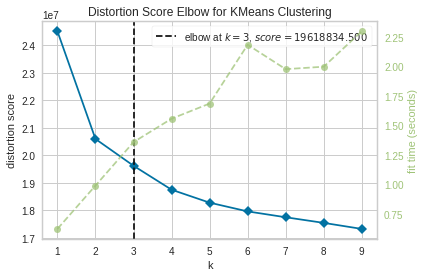

In [63]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(img_data_reduced)        # Fit data to visualizer
visualizer.show() 

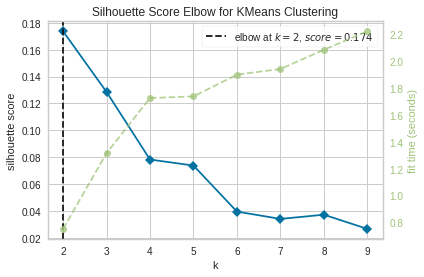

In [39]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit( img_data_reduced)        # Fit the data to the visualizer
visualizer.show()  

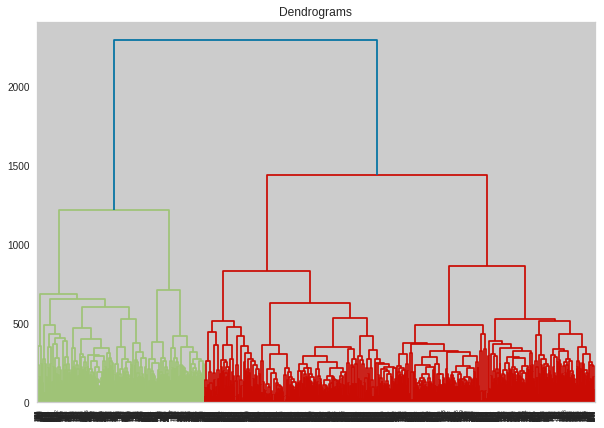

In [38]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage( img_data_reduced, method='ward'))

##Subpart c: visualizing communities

In [53]:
color_list= dend['color_list']
g_list=[] 
r_list=[] 

for idx,color in enumerate(color_list):
  if color=='g' and len(g_list)!=5:
    g_list.append(idx)
  elif color=='r' and len(r_list)!=5:
    r_list.append(idx)
  if len(r_list)==5 and len(g_list)==5:
    break


print('total red instances: ', color_list.count('r'))
print('total green instances: ', color_list.count('g'))

total red instances:  2110
total green instances:  908


class Red~


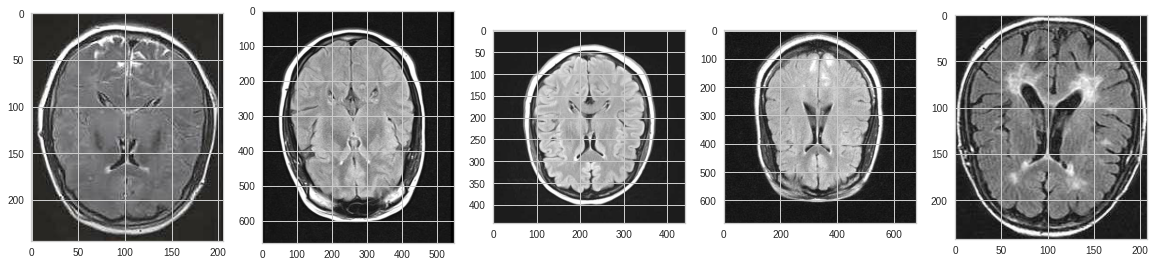

In [54]:
plt.figure(figsize=(20,20))

no_folder=r'/content/drive/MyDrive/Colab Notebooks/data_sets/archive (1)/no'
print('class Red~')
for i,index in enumerate(r_list):
    image_path= os.path.join(no_folder, "no"+str(index)+".jpg")
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(img)

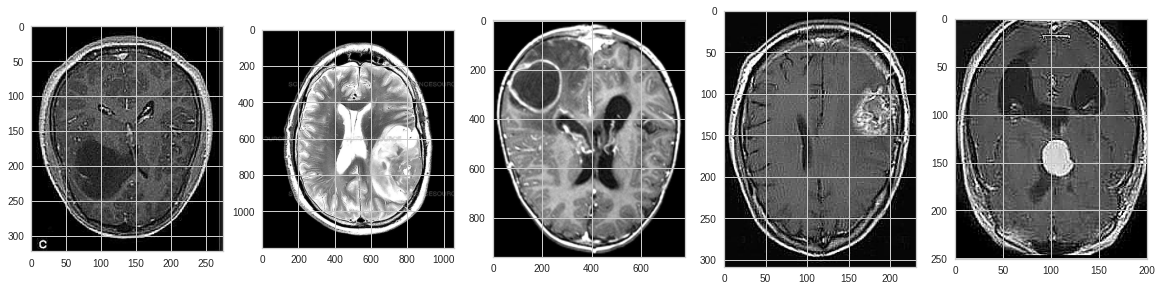

In [62]:
plt.figure(figsize=(20,20))

yes_folder=r'/content/drive/MyDrive/Colab Notebooks/data_sets/archive (1)/no'
print('class Green~')
for i,index in enumerate(g_list):
    image_path= os.path.join(yes_folder, "no"+str(index)+".jpg")
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    plt.imshow(img)




##Subpart e: K-Means and drawing comparisons

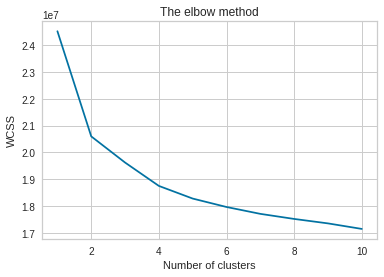

In [65]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(img_data_reduced)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [68]:
from collections import Counter, defaultdict

kmeans = KMeans(n_clusters=2, random_state=0).fit(img_data_reduced)

print(Counter(kmeans.labels_))

Counter({0: 1785, 1: 1235})


In [73]:
clusters_indices = defaultdict(list)
for index, c  in enumerate(kmeans.labels_):
    clusters_indices[c].append(index)
